# Week 4 - Principal Component Analysis

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysnptools.snpreader import Bed

In [6]:

def empirical_covariance(X):
    """
    Calculates the empirical covariance matrix for a given dataset.
    
    Parameters:
    X (numpy.ndarray): A 2D numpy array where rows represent samples and columns represent features.
    
    Returns:
    tuple: A tuple containing the mean of the dataset and the covariance matrix.
    """
    N = X.shape[0]  # Number of samples
    mean = X.mean(axis=0)  # Calculate the mean of each feature
    X_centered = X - mean[np.newaxis, :]  # Center the data by subtracting the mean
    covariance = X_centered.T @ X_centered / (N - 1)  # Compute the covariance matrix
    return mean, covariance

class PCA:
    def __init__(self, k=None):
        """
        Initializes the PCA class without any components.

        Parameters:
        k (int, optional): Number of principal components to use.
        """
        self.pc_variances = None  # Eigenvalues of the covariance matrix
        self.principal_components = None  # Eigenvectors of the covariance matrix
        self.mean = None  # Mean of the dataset
        self.k = k  # the number of dimensions

    def fit(self, X):
        """
        Fit the PCA model to the dataset by computing the covariance matrix and its eigen decomposition.
        
        Parameters:
        X (numpy.ndarray): The data to fit the model on.
        """
        self.mean, covariance = empirical_covariance(X=X)
        eig_values, eig_vectors = np.linalg.eigh(covariance)  # Compute eigenvalues and eigenvectors
        order = np.argsort(eig_values)[::-1]  # Get indices of eigenvalues in descending order
        self.pc_variances = eig_values[order]  # Sort the eigenvalues
        self.principal_components = eig_vectors[:, order]  # Sort the eigenvectors
        if self.k is not None:
            self.pc_variances = self.pc_variances[:self.k]
            self.principal_components = self.principal_components[:,:self.k]

    def transform(self, X):
        """
        Transform the data into the principal component space.
        
        Parameters:
        X (numpy.ndarray): Data to transform.
        
        Returns:
        numpy.ndarray: Transformed data.
        """
        X_centered = X - self.mean
        return X_centered @ self.principal_components

    def reverse_transform(self, Z):
        """
        Transform data back to its original space.
        
        Parameters:
        Z (numpy.ndarray): Transformed data to invert.
        
        Returns:
        numpy.ndarray: Data in its original space.
        """
        return Z @ self.principal_components.T + self.mean

    def variance_explained(self):
        """
        Returns the amount of variance explained by the first k principal components.
        
        Returns:
        numpy.ndarray: Variances explained by the first k components.
        """
        return self.pc_variances

(569, 17)
L1 reconstruction error for full PCA : 8.4629E-11 
L1 reconstruction error for rank 0 PCA : 1.6777E+05 
L1 reconstruction error for rank 1 PCA : 1.2028E+04 
L1 reconstruction error for rank 2 PCA : 2.1850E+03 
L1 reconstruction error for rank 3 PCA : 3.8183E+02 
L1 reconstruction error for rank 4 PCA : 1.7719E+02 
L1 reconstruction error for rank 5 PCA : 7.6762E+01 
L1 reconstruction error for rank 6 PCA : 5.2567E+01 
L1 reconstruction error for rank 7 PCA : 3.9781E+01 
L1 reconstruction error for rank 8 PCA : 2.9551E+01 
L1 reconstruction error for rank 9 PCA : 2.2753E+01 
L1 reconstruction error for rank 10 PCA : 1.3871E+01 
L1 reconstruction error for rank 11 PCA : 8.7419E+00 
L1 reconstruction error for rank 12 PCA : 5.8956E+00 
L1 reconstruction error for rank 13 PCA : 2.5516E+00 
L1 reconstruction error for rank 14 PCA : 1.2845E+00 
L1 reconstruction error for rank 15 PCA : 4.4876E-01 
L1 reconstruction error for rank 16 PCA : 8.4629E-11 


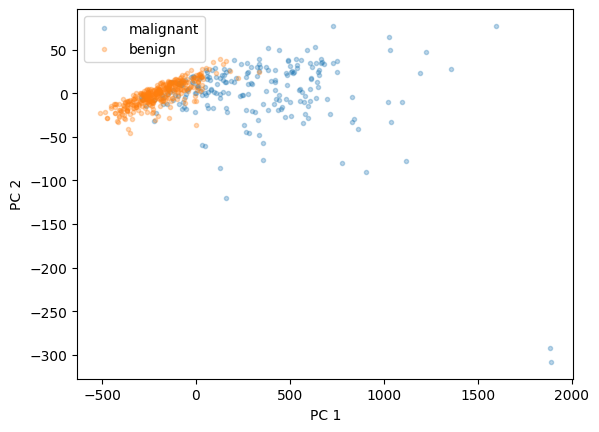

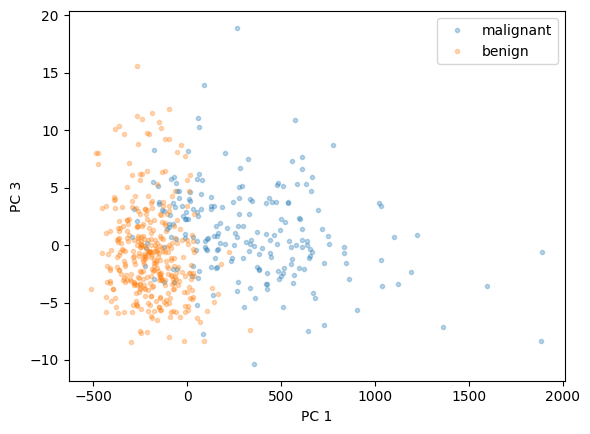

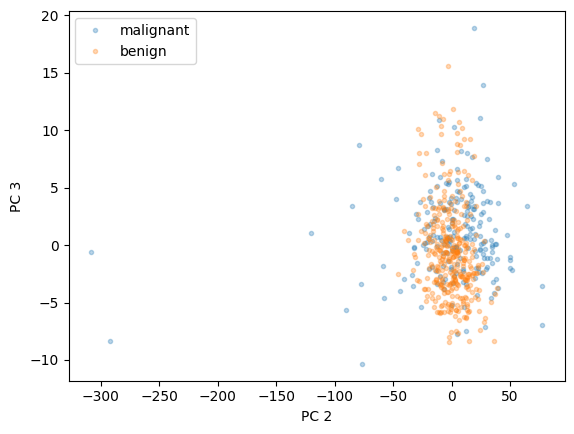

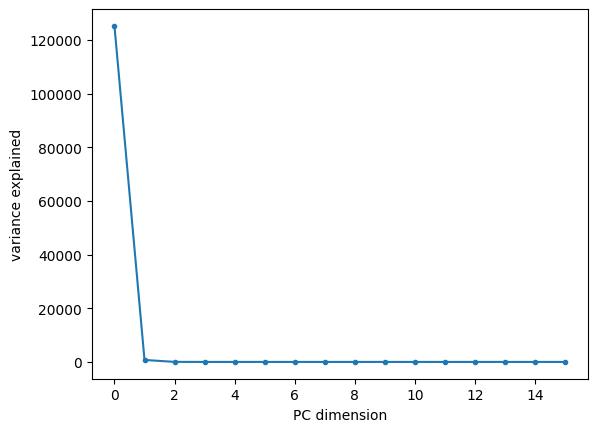

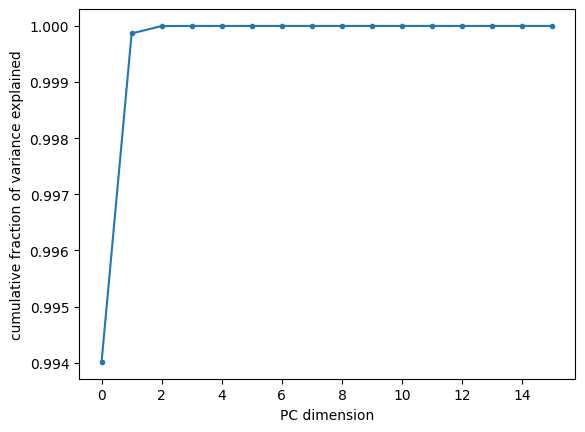

In [7]:
data = pd.read_csv('../datasets/breast_cancer_data/data_processed.csv')
print(data.shape)
# y includes our labels and x includes our features
y = data.diagnosis      # M or B 
list = ['diagnosis']
df = data.drop(list,axis = 1 )  # load data into a dataframe
X = df.values   # convert to a numpy array

pca = PCA()
pca.fit(X=X)

X_pc = pca.transform(X)
X_reconstruction_full = pca.reverse_transform(X_pc)
print("L1 reconstruction error for full PCA : %.4E " % (np.absolute(X - X_reconstruction_full).sum()))

for rank in range(X_pc.shape[1]+1):
    pca_lowrank = PCA(k=rank)
    pca_lowrank.fit(X=X)
    X_lowrank = pca_lowrank.transform(X)
    X_reconstruction = pca_lowrank.reverse_transform(X_lowrank)
    print("L1 reconstruction error for rank %i PCA : %.4E " % (rank, np.absolute(X - X_reconstruction).sum()))

# plt.ion()
fig = plt.figure()
plt.plot(X_pc[y=="M"][:,0], X_pc[y=="M"][:,1],'.', alpha = 0.3)
plt.plot(X_pc[y=="B"][:,0], X_pc[y=="B"][:,1],'.', alpha = 0.3)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(["malignant", "benign"])

fig2 = plt.figure()
plt.plot(X_pc[y=="M"][:,0], X_pc[y=="M"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="B"][:,0], X_pc[y=="B"][:,2],'.', alpha = 0.3)
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.legend(["malignant", "benign"])


fig3 = plt.figure()
plt.plot(X_pc[y=="M"][:,1], X_pc[y=="M"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="B"][:,1], X_pc[y=="B"][:,2],'.', alpha = 0.3)
plt.xlabel("PC 2")
plt.ylabel("PC 3")
plt.legend(["malignant", "benign"])

fig4 = plt.figure()
plt.plot(pca.variance_explained(),'.-')
plt.xlabel("PC dimension")
plt.ylabel("variance explained")

fig4 = plt.figure()
plt.plot(pca.variance_explained().cumsum() / pca.variance_explained().sum(),'.-')
plt.xlabel("PC dimension")
plt.ylabel("cumulative fraction of variance explained")

plt.show()

(267, 10626)
L1 reconstruction error for full PCA : 8.0216E-10 
L1 reconstruction error for rank 0 PCA : 3.7316E+05 
L1 reconstruction error for rank 1 PCA : 3.4989E+05 
L1 reconstruction error for rank 2 PCA : 3.3704E+05 
L1 reconstruction error for rank 3 PCA : 3.3322E+05 
L1 reconstruction error for rank 4 PCA : 3.3049E+05 


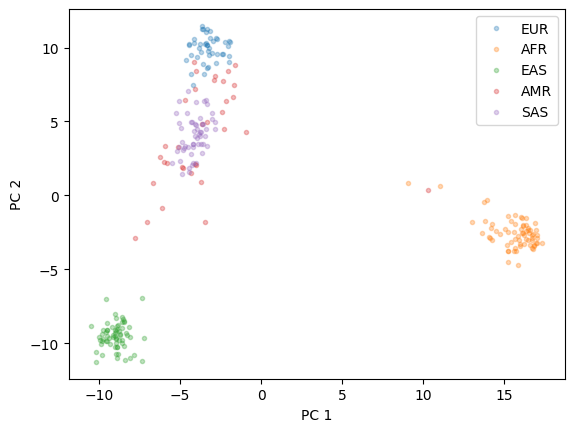

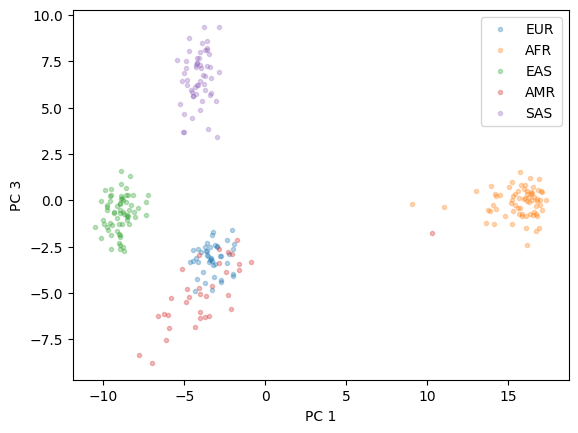

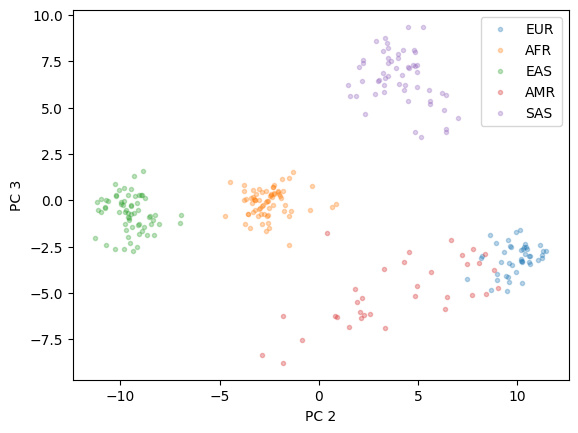

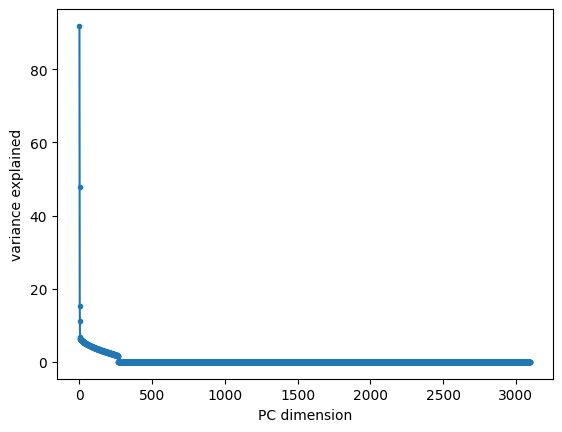

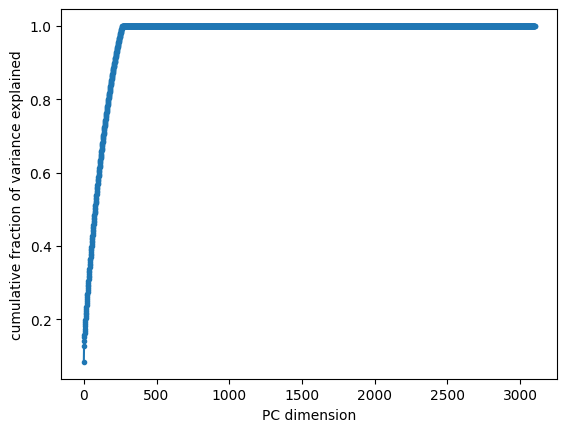

In [ ]:
snpreader = Bed('./../datasets/genetic_data/example2.bed', count_A1=True)
data = snpreader.read()
print(data.shape)
# y includes our labels and x includes our features
labels = pd.read_csv("./../datasets/genetic_data/1kg_annotations_edit.txt", sep="\t", index_col="Sample")
list1 = data.iid[:,1].tolist()  #list with the Sample numbers present in genetic dataset
labels = labels[labels.index.isin(list1)]  #filter labels DataFrame so it only contains the sampleIDs present in genetic data
y = labels.SuperPopulation  # EUR, AFR, AMR, EAS, SAS
X = data.val[:, ~np.isnan(data.val).any(axis=0)]  #load genetic data to X, removing NaN values

pca = PCA()
pca.fit(X=X)

X_pc = pca.transform(X)
X_reconstruction_full = pca.reverse_transform(X_pc)
print("L1 reconstruction error for full PCA : %.4E " % (np.absolute(X - X_reconstruction_full).sum()))

for rank in range(5):    #more correct: X_pc.shape[1]+1
    pca_lowrank = PCA(k=rank)
    pca_lowrank.fit(X=X)
    X_lowrank = pca_lowrank.transform(X)
    X_reconstruction = pca_lowrank.reverse_transform(X_lowrank)
    print("L1 reconstruction error for rank %i PCA : %.4E " % (rank, np.absolute(X - X_reconstruction).sum()))


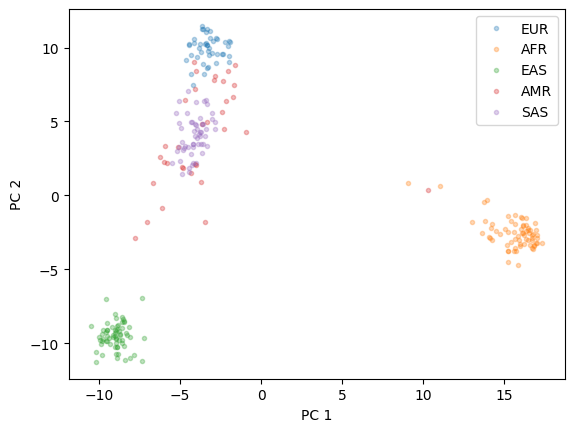

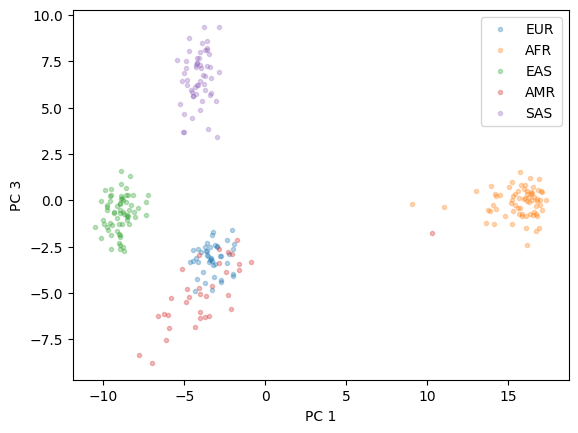

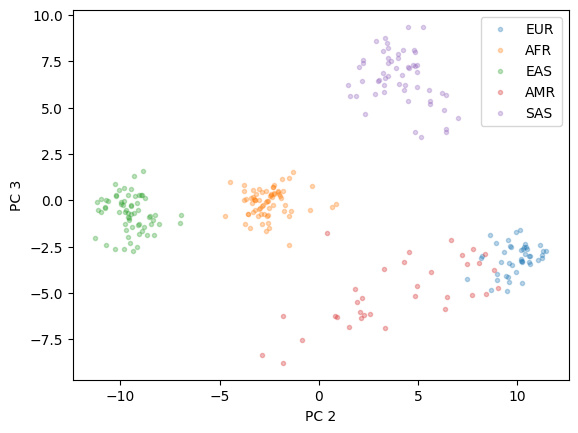

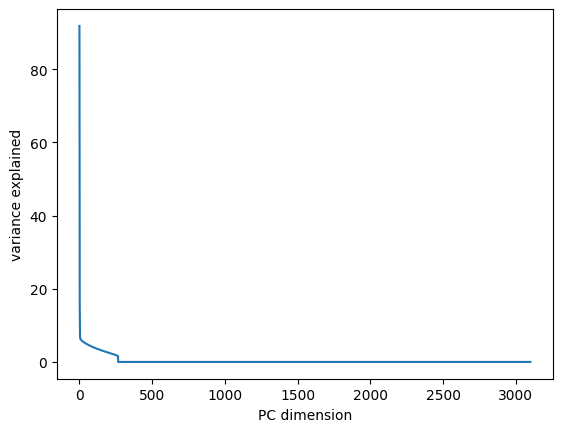

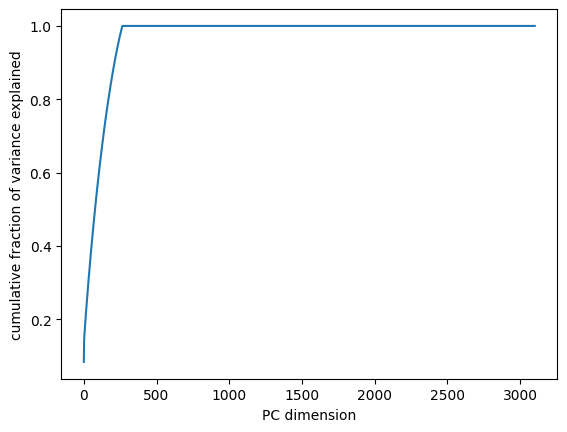

In [12]:

fig = plt.figure()
plt.plot(X_pc[y=="EUR"][:,0], X_pc[y=="EUR"][:,1],'.', alpha = 0.3)
plt.plot(X_pc[y=="AFR"][:,0], X_pc[y=="AFR"][:,1],'.', alpha = 0.3)
plt.plot(X_pc[y=="EAS"][:,0], X_pc[y=="EAS"][:,1],'.', alpha = 0.3)
plt.plot(X_pc[y=="AMR"][:,0], X_pc[y=="AMR"][:,1],'.', alpha = 0.3)
plt.plot(X_pc[y=="SAS"][:,0], X_pc[y=="SAS"][:,1],'.', alpha = 0.3)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(["EUR", "AFR","EAS","AMR","SAS"])

fig2 = plt.figure()
plt.plot(X_pc[y=="EUR"][:,0], X_pc[y=="EUR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="AFR"][:,0], X_pc[y=="AFR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="EAS"][:,0], X_pc[y=="EAS"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="AMR"][:,0], X_pc[y=="AMR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="SAS"][:,0], X_pc[y=="SAS"][:,2],'.', alpha = 0.3)
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.legend(["EUR", "AFR","EAS","AMR","SAS"])


fig3 = plt.figure()
plt.plot(X_pc[y=="EUR"][:,1], X_pc[y=="EUR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="AFR"][:,1], X_pc[y=="AFR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="EAS"][:,1], X_pc[y=="EAS"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="AMR"][:,1], X_pc[y=="AMR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="SAS"][:,1], X_pc[y=="SAS"][:,2],'.', alpha = 0.3)
plt.xlabel("PC 2")
plt.ylabel("PC 3")
plt.legend(["EUR", "AFR","EAS","AMR","SAS"])

fig4 = plt.figure()
plt.plot(pca.variance_explained())
plt.xlabel("PC dimension")
plt.ylabel("variance explained")

fig4 = plt.figure()
plt.plot(pca.variance_explained().cumsum() / pca.variance_explained().sum())
plt.xlabel("PC dimension")
plt.ylabel("cumulative fraction of variance explained")
plt.show()

